In [1]:
#This program trains a forward propogating neural network to determine if a flower is red or blue, given it's length and width.

In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt #Used for plotting
import numpy as np #Only used for generating random number

In [4]:
#[Length, width, flower colour (1 = Red, 0 = Blue)]

data = [[3,   1,   1],
        [2,   1.5, 0],
        [4,   1.5, 1],
        [1.5,   2, 0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [4.5,  1,  1],
        [1,    1,  0],]

In [5]:
#Sigmoid function
def sigmoid(x):
    return 1/(1+ np.exp(-x))

#Sigmoid prime function
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

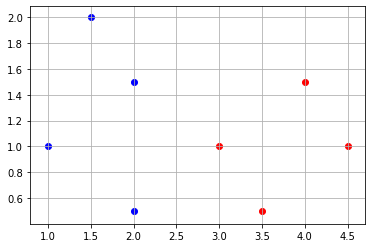

In [6]:
#Plot data on scatterplot
def plot_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

plot_data()

In [7]:
#Randomly initialize weights and bias
w1 = np.random.randn() 
w2 = np.random.randn()
b = np.random.randn()

In [8]:
#Setup lists which will be graphed later
costs = []
w1_values = []
w2_values = []
b_values = []

In [9]:
#Sets iterations and learning rate
iterations = 50000
learning_rate = 0.1

In [10]:
#Training loop
for i in range(iterations):
    
    #Pick a random flower from our data set
    ri = np.random.randint(len(data))
    point = data[ri]
    
    #Get it's activations (ie it's length(a1) and width(a2))
    a1 = point[0]
    a2 = point[1]
    
    #Compute the weighted sum
    weighted_sum = a1*w1 + a2*w2
    
    #Add a bias
    z = weighted_sum + b
    
    #Squish this so it's between 0 and 1 : This is our prediction
    a = sigmoid(z)
    
    #Calculate squared cost
    target = point[2]
    cost = np.square(a - target)
        
    #How does cost change as we change w1
    dcost_da = 2*(a - target)
    da_dz = sigmoid_p(z)
    dz_dw1 = a1
    dcost_dw1 = dz_dw1 * da_dz * dcost_da
    
    #How does cost change as we change w2
    dz_dw2 = a2
    dcost_dw2 = dz_dw2 * da_dz * dcost_da
    
    #How does cost change as we change b
    dz_db = 1
    dcost_db = dcost_da * da_dz * dz_db
    
    #Back propogation
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    w1_values.append(w1)
    w2_values.append(w2)
    b_values.append(b)
   
    #For every 100 itterations
    if i % 100 == 0:
        cost_sum = 0
    
        #Calculate the cost of every datapoint
        for j in range(len(data)):

            point = data[j]

            z = point[0]*w1 + point[1]*w2 + b
            a = sigmoid(z)

            target = point[2]
            cost_sum += np.square(a - target)
            
    #Append the average to the costs list
    costs.append(cost_sum / len(data))

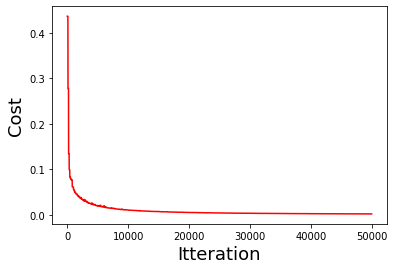

In [11]:
#Shows how the cost is lowering (ie Becoming more accurate)
plt.xlabel('Itteration', fontsize=18)
plt.ylabel('Cost', fontsize=18)
plt.plot(costs, c = 'r')

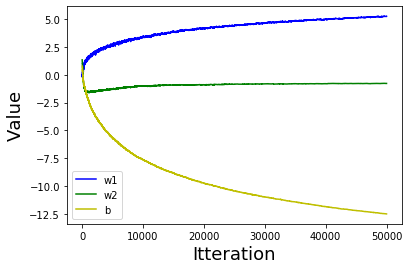

In [12]:
#Shows the values w1,w2 and b are tending towards
plt.plot(w1_values, c = 'b', label = 'w1')
plt.plot(w2_values, c = 'g', label = 'w2')
plt.plot(b_values, c = 'y', label = 'b')
plt.xlabel('Itteration', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.legend(loc="lower left")

In [13]:
#Predicts what colour the flower will be, given is length and width
def what_flower(length, width):
    
    z = length*w1 + width*w2 + b
    a = sigmoid(z)
    
    how_sure = None
    
    if a < 0.5:
        print("Blue")
        how_sure = round((1 - a)*100)
    else:
        print("Red")
        how_sure = round(a*100)
 
    print("{}% sure".format(how_sure))

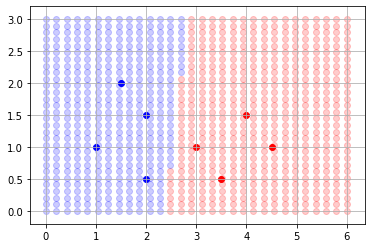

In [14]:
#Graphs the boundary line on data
for x in np.linspace(0, 6, 30):
    for y in np.linspace(0, 3, 30):
        a = sigmoid(w1*x + w2*y + b)
        c = 'b'
        if a > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
plot_data()

In [15]:
#Makes prediction on mystery flower
what_flower(3,0.5)

Red
95.0% sure
